In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [14]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Task 1

In [15]:
# remove first column
boston_df = boston_df[boston_df.columns[1:]]

In [16]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
boston_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2

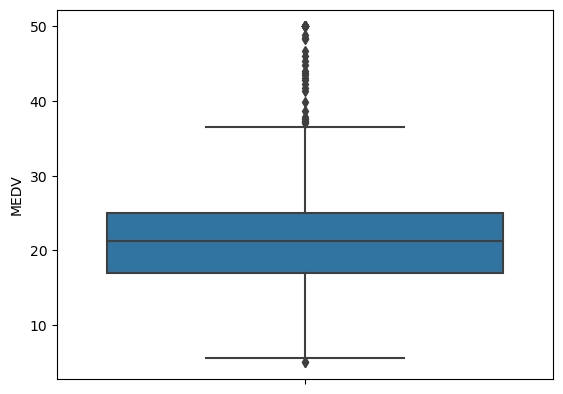

In [18]:
# boxplot for MEDV
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.show()

we can see that median value from the above boxplot is slightly above 20 and we can observe some outlier values as well.

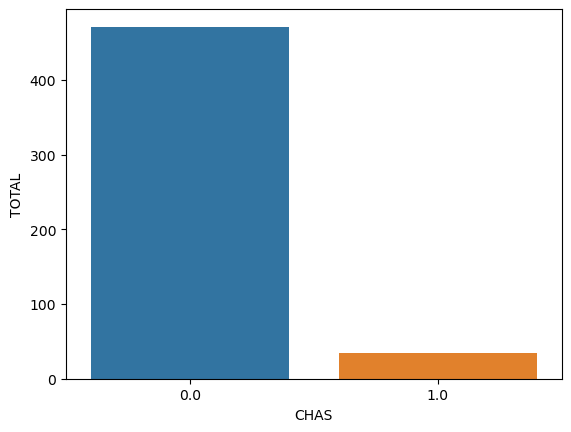

In [20]:
# Barplot for Charles river
chas_agg = boston_df.groupby('CHAS')['CRIM'].count().reset_index().rename(columns={'CRIM': 'TOTAL'})
ax = sns.barplot(x="CHAS", y='TOTAL', data=chas_agg)
plt.show()

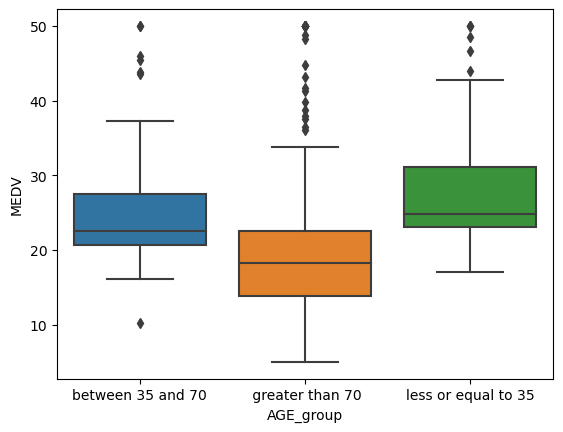

In [21]:
# boxplot for MEV vs AGE
boston_df.loc[boston_df.AGE <= 35,'AGE_group'] = 'less or equal to 35'
boston_df.loc[(boston_df.AGE > 35) & (boston_df.AGE <= 70),'AGE_group'] = 'between 35 and 70'
boston_df.loc[boston_df.AGE > 70,'AGE_group'] = ' greater than 70'
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.show()

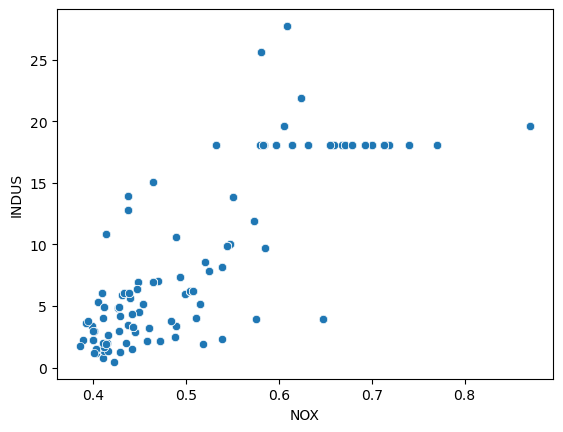

In [22]:
# scatter plot
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

we can say that the 2 variable might have a potential correlation. 

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

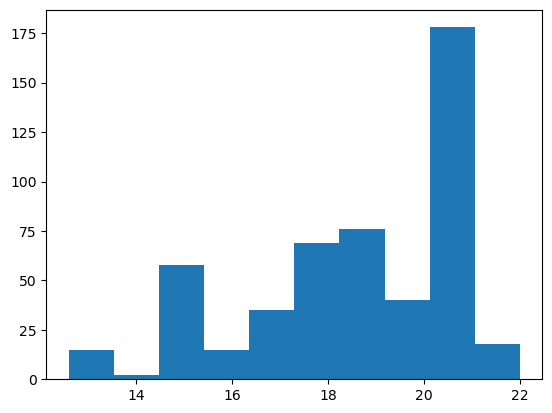

In [23]:
## histogram
pyplot.hist(boston_df['PTRATIO'])

## Task 3

### t-test
State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is difference in median value of houses bounded by the Charles river")

In [24]:
scipy.stats.levene(boston_df['MEDV'],
                   boston_df['CHAS'], center='mean')

# since the p-value is less than 0.05 we will reject the null hypothesis and conclude there is difference between median value of houses bounded by the Charles river

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

### ANOVA

State the hypothesis

*   $H\_0: µ\_1 = µ\_2:$ (there is no difference in median value of houses for each proportion of owner occupied prior to 1940)
*   $H\_1:$ there is difference in median value of houses for each proportion of owner occupied prior to 1940

In [25]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# since the p-value is less than 0.05 we will reject the null hypothesis and conclude there is difference in median value for each proportion o owner occupied prior to 1940

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


### Pearsons


State the hypothesis

*   $H\_0:$ there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [26]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# the p-value is less than 0.05 and therefore we will reject the null hypothesis and we can conclude that there is a relationship between the 2 variables

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

### regression

State the hypothesis

*   $H\_0:$ there is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
*   $H\_1:$ there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [27]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        18:51:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values is less than 0.05 so we reject the null hypotehsis and that means there is an impact